In [1]:
import cv2
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import normalize
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense


In [2]:
image_directory= r"D:\abcdefghj\Projects\Covid_Detection\Brain_Tumor\\"
no_tumor_images=os.listdir(image_directory+"/no")
yes_tumor_images=os.listdir(image_directory+"/yes")
dataset=[]
label=[]

# no_tumor_images
for i, image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no//'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)
        
for i, image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes//'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image))
        label.append(1)
        
# print(dataset)

In [3]:
dataset=np.array(dataset)
label=np.array(label)

In [4]:
dataset

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [4]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

print(x_train.shape)

(2400, 64, 64, 3)


In [5]:
x_train= normalize(x_train, axis=1)
x_test= normalize(x_test, axis=1)

In [6]:
model= Sequential()

model.add(Conv2D(32,(3,3), input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test) ,shuffle=False)

Epoch 1/10
150/150 [==============================] - 9s 48ms/step - loss: 0.5534 - accuracy: 0.7171 - val_loss: 0.5515 - val_accuracy: 0.7150
Epoch 2/10
150/150 [==============================] - 7s 45ms/step - loss: 0.4286 - accuracy: 0.8188 - val_loss: 0.3763 - val_accuracy: 0.8350
Epoch 3/10
150/150 [==============================] - 7s 49ms/step - loss: 0.3224 - accuracy: 0.8679 - val_loss: 0.3265 - val_accuracy: 0.8367
Epoch 4/10
150/150 [==============================] - 7s 49ms/step - loss: 0.2543 - accuracy: 0.9004 - val_loss: 0.2283 - val_accuracy: 0.9167
Epoch 5/10
150/150 [==============================] - 6s 41ms/step - loss: 0.1889 - accuracy: 0.9325 - val_loss: 0.1760 - val_accuracy: 0.9433
Epoch 6/10
150/150 [==============================] - 6s 38ms/step - loss: 0.1301 - accuracy: 0.9579 - val_loss: 0.1320 - val_accuracy: 0.9633
Epoch 7/10
150/150 [==============================] - 7s 44ms/step - loss: 0.0901 - accuracy: 0.9688 - val_loss: 0.1204 - val_accuracy: 0.9667

In [9]:
from sklearn.metrics import accuracy_score

# Assuming you have a trained CNN model named "model"

# Use the model to predict labels for the test data
y_pred = model.predict(x_test)

# Convert the predicted probabilities to binary labels (0 or 1) if needed
# For example, if your model outputs probabilities, you might round them to the nearest integer.
y_pred = np.round(y_pred).astype(int)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


19/19 [==============================] - 1s 21ms/step
Accuracy: 93.00%


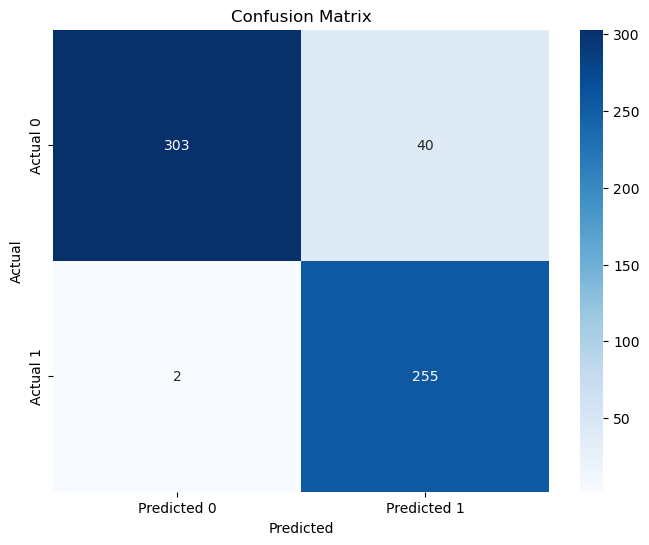

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Assuming you have already rounded y_pred and have true labels in y_test

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
TP = conf_matrix[1][1]  # True Positives
TN = conf_matrix[0][0]  # True Negatives
FP = conf_matrix[0][1]  # False Positives
FN = conf_matrix[1][0]
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity =  TP / (TP + FN)
print(accuracy)
print(sensitivity)
print(specificity)

0.93
0.9922178988326849
0.8833819241982507


In [54]:
model.save('braintumor.h5')

In [72]:
img= cv2.imread(r'D:\abcdefghj\Projects\Covid_Detection\Brain_Tumor\pred\pred39.jpg')
img= Image.fromarray(img)
# print(img)
img=img.resize((64,64))
img=np.array(img)
input=np.expand_dims(img, axis=0)

result= model.predict(input)
print(result)

1/1 [==============================] - 0s 15ms/step
[[1.]]


In [3]:
from tensorflow.keras.models import load_model
model1=load_model('braintumor.h5')


In [8]:
img= cv2.imread(r'C:\Users\dnyan\Downloads\R.png')
img= Image.fromarray(img)
# print(img)
img=img.resize((64,64))
img=np.array(img)
input=np.expand_dims(img, axis=0)

result= model1.predict(input)
print(result)

if result==1:
    print("tumor")

1/1 [==============================] - 0s 159ms/step
[[1.]]
tumor
